<table>
  <tr>
    <td><div align="left"><font size="30">Grey scale images</font></div></td>
    <td><img src="images/RVSS-logo.png" width="400"></td>
  </tr>
</table>

In [1]:
%matplotlib notebook

import sys
!{sys.executable} -m pip install machinevision-toolbox-python # used to install machinevision-toolbox into the kernel

import numpy as np
import matplotlib.pyplot as plt
import math
from machinevisiontoolbox import Image
import ipywidgets as widgets

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/mxnet_p36/bin/python -m pip install --upgrade pip' command.


<p style="border:3px; background-color:#FF0000; padding: 1em; text-align: center;">Note that in this section we will consider grey scale or monochrome images.  Have a look at the color-images.ipynb notebook in this folder.</p>

# Images and pixels

We will start by loading an image

In [2]:
mona = Image('monalisa.png', grey=True)

`mona` is an object that encapsulates a NumPy array (a python style matrix) with dimensions

In [3]:
mona.shape

(700, 677)

which we see has 700 rows and 677 columns.
The data itself, the "internal" NumPy array can be accessed by

In [4]:
mona.image

array([[42, 70, 88, ..., 51, 66, 64],
       [47, 75, 82, ..., 61, 76, 61],
       [57, 74, 70, ..., 71, 86, 58],
       ...,
       [11, 15, 11, ...,  9,  8,  7],
       [12, 14, 10, ...,  8,  6,  5],
       [12, 14, 10, ...,  8,  6,  3]], dtype=uint8)

is simply a big table of 8-bit integers which represent brightness of each pixel as a number between 0 (black) and 255 (white).

We can display it as an image

<IPython.core.display.Javascript object>


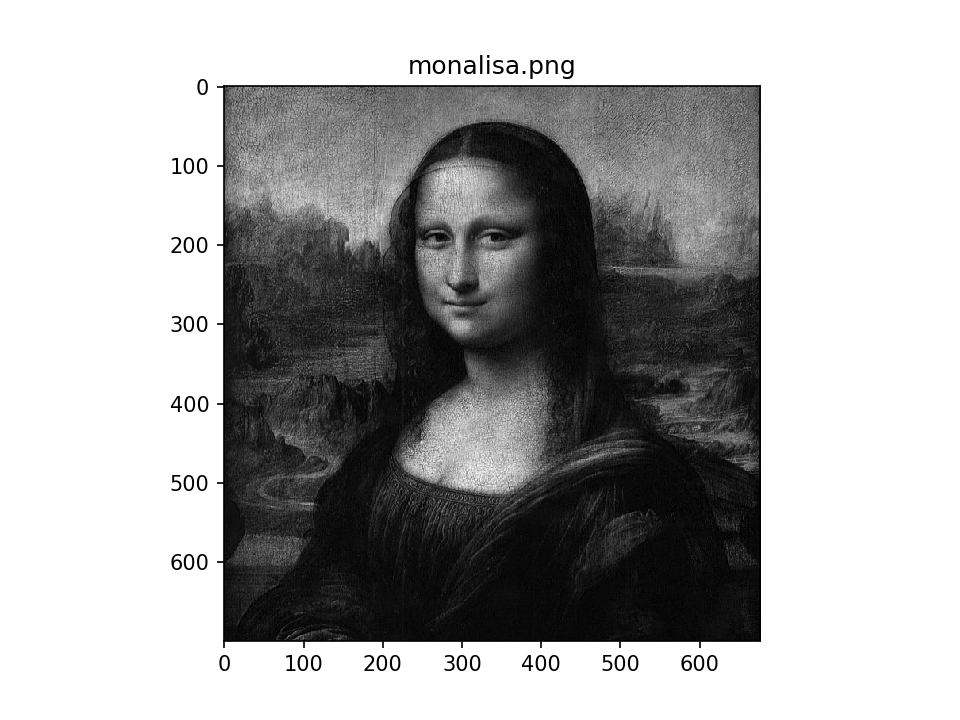

In [5]:
mona.disp();

The notebook image view is interactive. If you drift your cursor over the image it displays, beneath, the pixel coordinate and the grey value of the pixel.  

You can turn that feature off by clicking the blue button containin the "power switch" icon.

In [6]:
# Q: Write code to display the value of the pixel at coordinate (200, 600)
print(mona.image[600,200])

12


**Hint, it is a very low value.  Verify this value using the cursor.**

We can plot a histogram which shows the frequency of the various grey levels within the image.

<IPython.core.display.Javascript object>


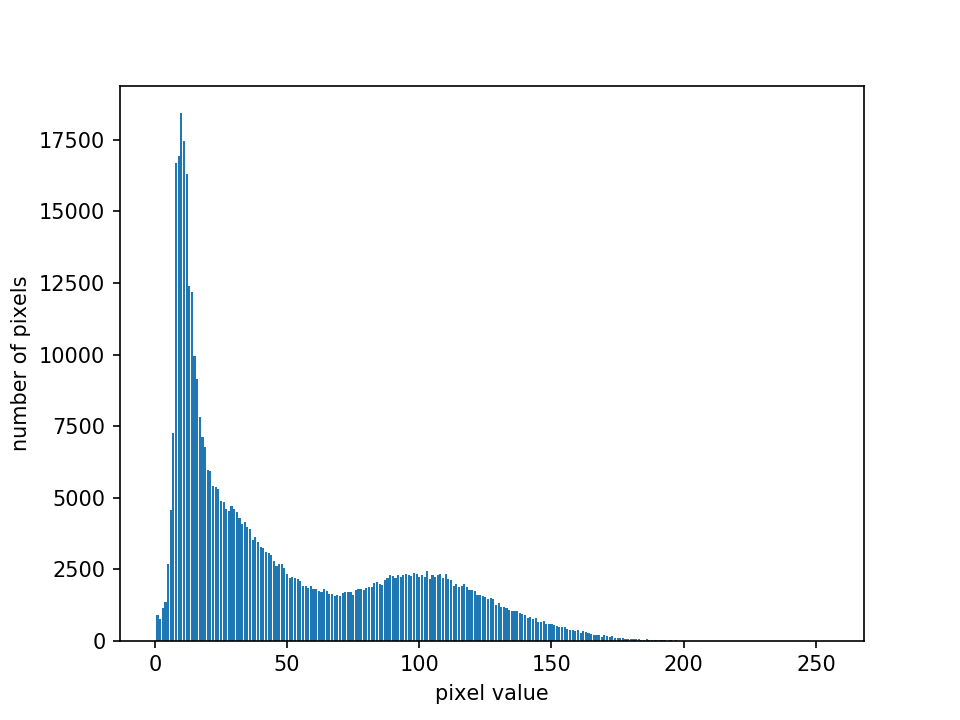

In [7]:
hist = mona.hist()
hist.plot()

Clearly the mean value is quite low

In [8]:
print(np.mean(mona.image))

50.24728634733066


and there are almost no pixels with values greater than 180.  Zoom into the figure to check this out, or 

In [9]:
# write code to compute the maximum grey level in the image
print(np.amax(mona.image))

205


# Binary images

Let's load an image that only has two unique pixel values: 0 or 255.

<IPython.core.display.Javascript object>


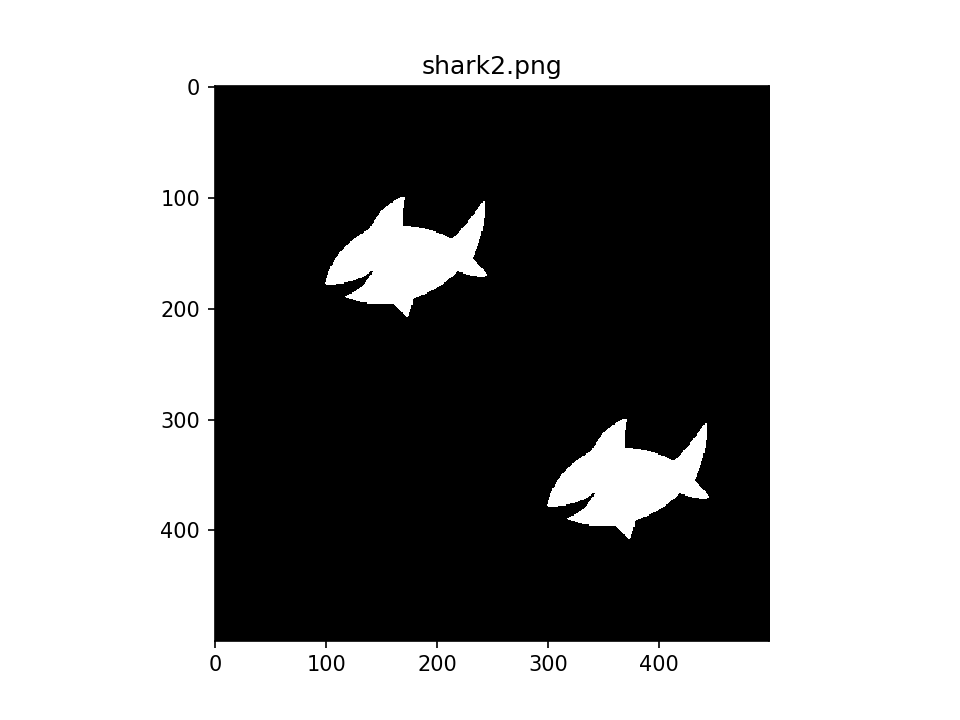

In [10]:
sharks = Image('shark2.png', grey=True)
sharks.disp();

**Q: move the cursor over the image to explore the pixel values shown in the bottom right corner.  What are the values of the black and white areas of the image?**

We can show a histogram of this image

<IPython.core.display.Javascript object>


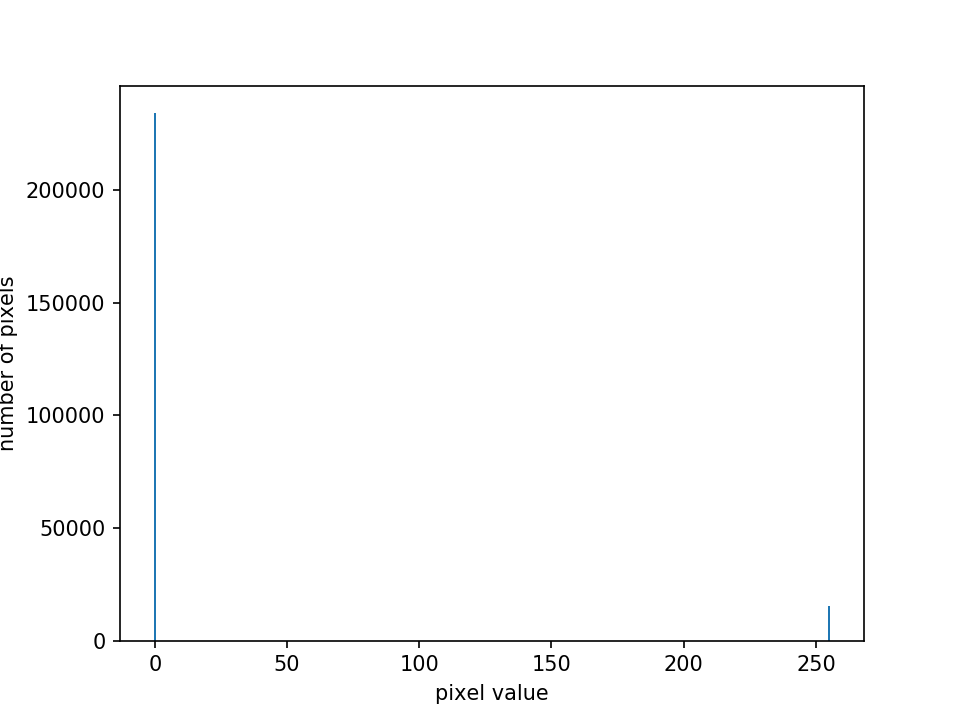

In [11]:
hist = sharks.hist()
hist.plot()

**Q: use the toolbar to zoom into this graph use the mouse to explore the values.  How many non-zero values in this histogram?  What are the heights of the peaks?  What should the peak heights sum up to?  Do they?**

Such an image, with just two different pixel values, is called a **binary image**.

Now let's look at another grey scale image.

<IPython.core.display.Javascript object>


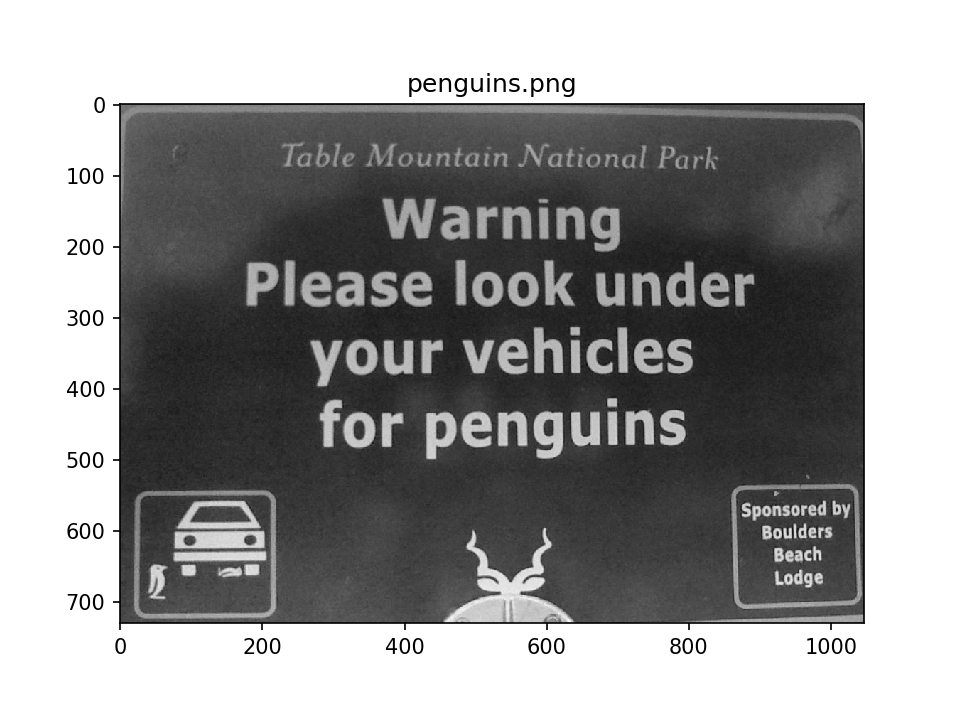

In [12]:
penguins = Image('penguins.png', grey=True)
penguins.disp();

<IPython.core.display.Javascript object>


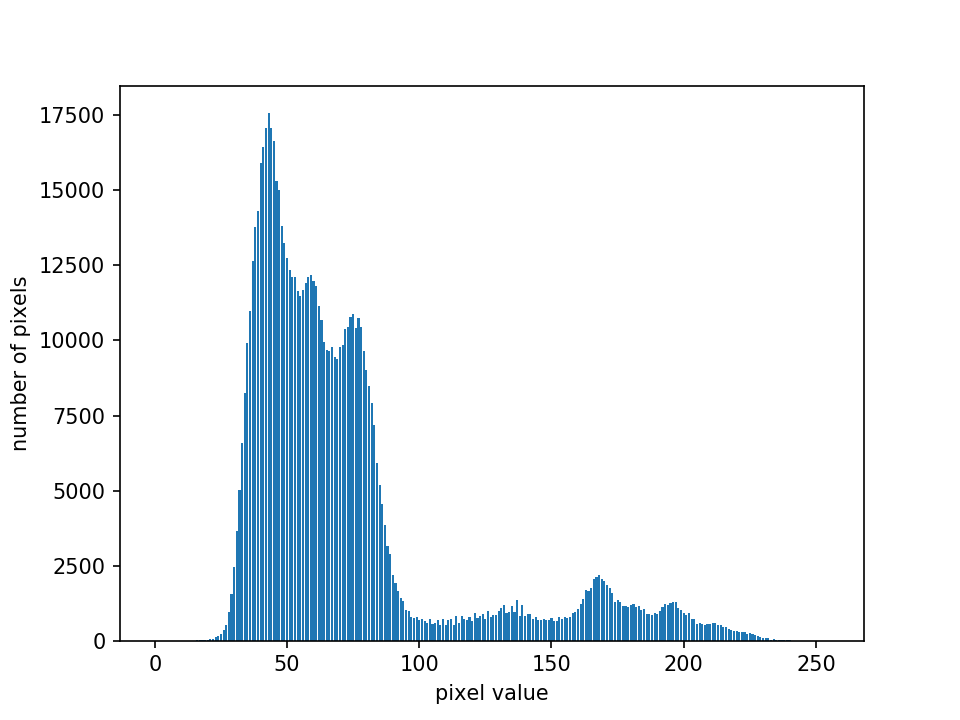

In [13]:
# Q. Add the code here to compute and plot the histogram
hist1 = penguins.hist()
hist1.plot()

This time we see a much richer distribution of pixel values.  A lot of pixels have a value less than 100 and these are the dark background of the sign.  Clearly there are many shades of black.  Similarly for the foreground, there are many shades of white.

**Q: Move the mouse over the original image to explore where these different grey levels appear.**

# Thresholding

A very classical image processing operation is thresholding.  We could turn the grey level image above into a binary image by comparing every pixel with a constant value called the threshold

<IPython.core.display.Javascript object>


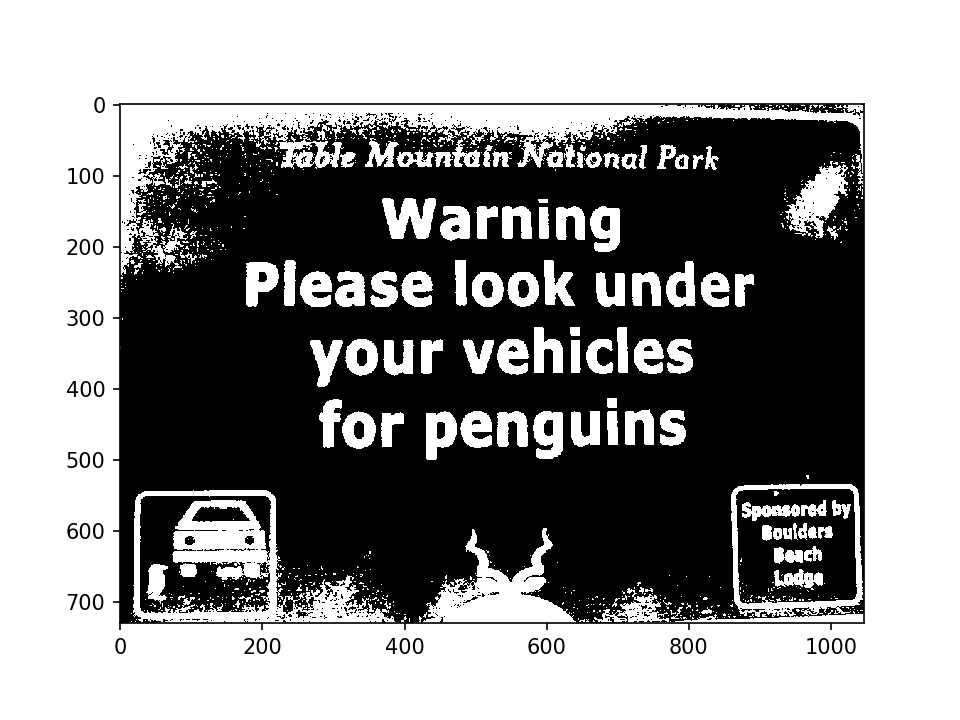

In [14]:
binary_image = penguins > 80
binary_image.disp();

We now have only two types of pixels, black (value of 0) or white (value of 1), but they don't cleanly map to what we perceive as the black and white parts of the image.  

**Q: adjust the threshold using the widget below, and explore the effect on the image.  Try to find a threshold that yields a binary image where black corresponds to the background of the sign and white corresponds to the foreground text.**

<p style="border:3px; background-color:#FF0000; font-weight: bold; padding: 1em; text-align: center;">Click the slider, don't drag it.</p>

In [15]:
@widgets.interact
def animate( threshold =  widgets.IntSlider(value=80, description='threshold:',  min=1, max=255)):
    binary_image = penguins > threshold
    binary_image.disp()



interactive(children=(IntSlider(value=80, description='threshold:', max=255, min=1), Output()), _dom_classes=(…

# Challenges with thresholding

Here is another greyscale image of a sign, but this one has a highlight due to the way the scene was lit.

<IPython.core.display.Javascript object>


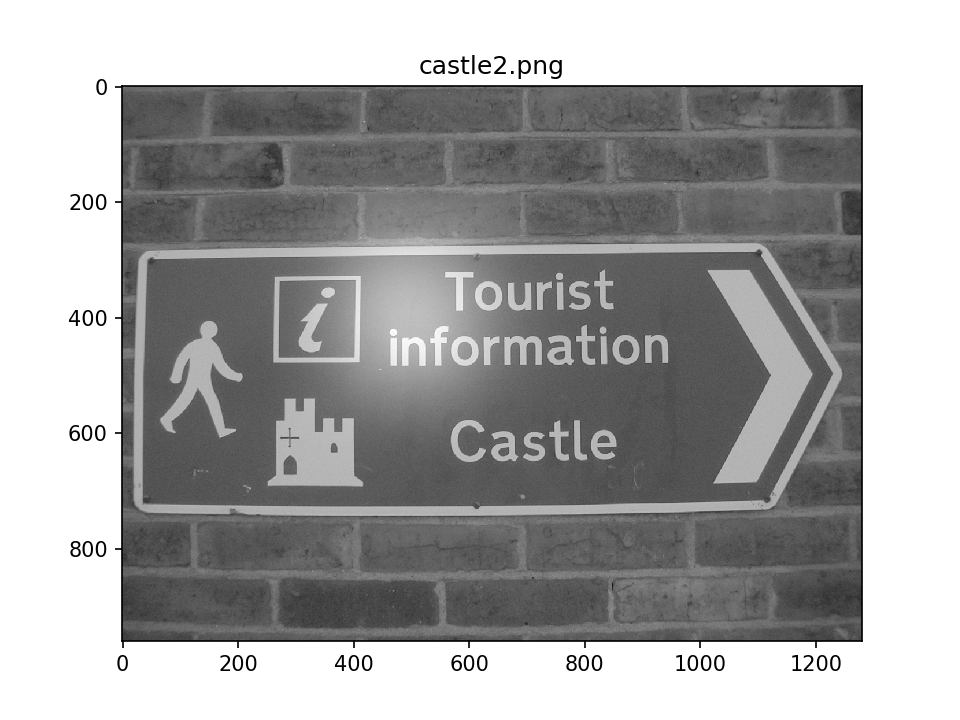

In [16]:
castle = Image('castle2.png', grey=True)
castle.disp();

<IPython.core.display.Javascript object>


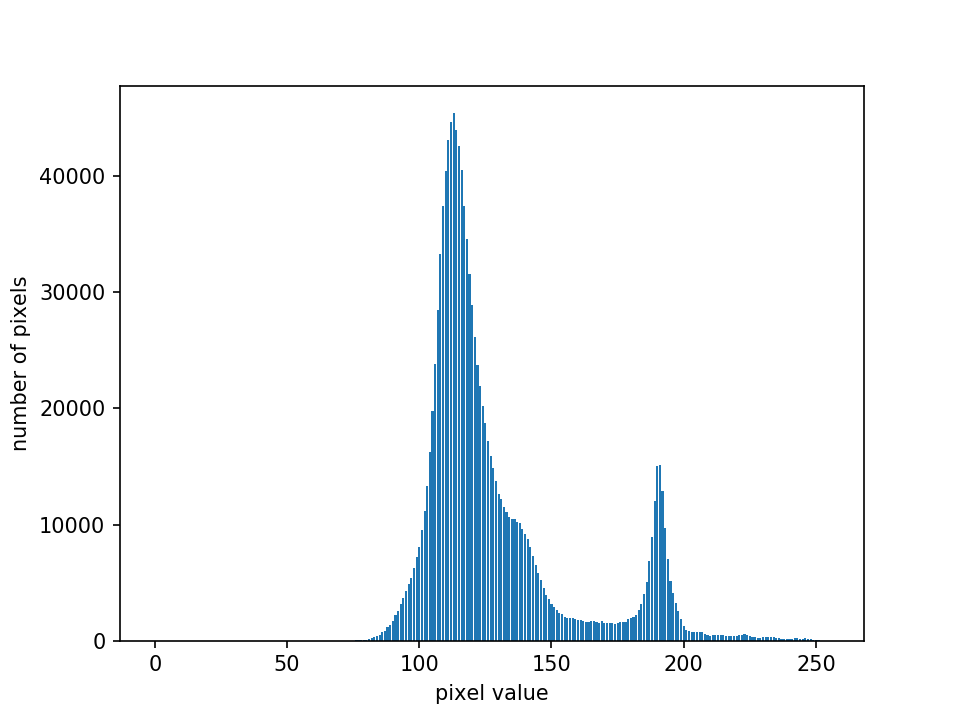

In [17]:
hist = castle.hist()
hist.plot()

This histogram is more bimodal, that is there are two peaks.  

**Q: Move the cursor over the histogram and you can read off the coordinates of the peaks.**

**Q: Move the mouse over the image, explore the pixel values in the sign and background, and relate that to what you see in the histogram.**

**Q: Using the widget try to find a good threshold that separates the lettering of the sign from the background**

In [18]:
@widgets.interact
def animate( threshold =  widgets.IntSlider(value=80, description='threshold:',  min=1, max=255)):
    binary_image = castle > threshold
    binary_image.disp()



interactive(children=(IntSlider(value=80, description='threshold:', max=255, min=1), Output()), _dom_classes=(…

You will this case is rather more sensitive, but also that it is impossible to find a single threshold that separate all letters from the background.  This is an example of the limitations of thresholding:

* how do we choose the threshold?
* how do we make thresholding robust to uneven or variable lighting conditions?